<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING

## Engenharia de Software

### Jessica Witzler Costacurta || RM99068
### Marcio Hitoshi Tahyra || RM552511


# Comparação entre gêneros: Drama vs. Comédia vs. Ação e Aventura

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from tabulate import tabulate

# Fazem parte da avaliação no Rotten Tomatoes
filmes = pd.read_csv('filmes.csv')
criticas = pd.read_csv('criticas.csv')
#

netflix = pd.read_csv('netflix.csv')
imdb = pd.read_csv('imdb.csv')

In [194]:
# IMDb

imdb.columns = ['id_link', 'titulo_imdb', 'ano_lanca_imdb', 'certificado', 'tempo_filme_imdb',
                'genero_imdb', 'avalia_publico', 'overview_imdb', 'score_filme', 'diretor_imdb',
                'ator1', 'ator2', 'ator3', 'ator4', 'total_votantes', 'gross']

# Netflix

netflix.columns = ['id_link', 'tipo', 'titulo_net', 'diretor_net', 'atores_net',
                'pais', 'ano_lanca_stream_net', 'ano_lanca_net', 'classificacao_net', 'tempo_filme_net',
                'genero_net', 'overview_net']

# Filmes - Rotten Tomatoes

filmes.columns = ['id_link', 'titulo', 'overview', 'comentario', 'classifica',
                'genero', 'diretor', 'autores', 'atores', 'ano_lanca',
                'ano_lanca_stream', 'tempo_filme', 'produtora', 'tomato_status', 'tomato_avalia',
                'tomato_contagem', 'publi_status', 'publi_avalia', 'publi_contagem', 'avalia_conta_critico',
                'avalia_fresh_critico', 'avalia_rotten_critico']


**Fizemos a junção dos Dataframes do Netflix, Rotten Tomatoes e IMDb**

In [195]:
imdb['id_link'] = imdb['id_link'].str.extract(r'(s\d+)')

imdb_netflix = pd.merge(imdb, netflix, on='id_link', how='outer')
combinado = pd.merge(imdb_netflix, filmes, on='id_link', how='outer')


### **Comparação da quantidade de filmes entre três gêneros principais?**


In [196]:
# Padroniza os gêneros
mapeamento_generos = {
    'Drama': ['Drama', 'Dramatic', 'TV Drama'],
    'Ação e Aventura': ['Action', 'Adventure', 'Action & Adventure', 'TV Action & Adventure'],
    'Comédia': ['Comedy', 'Comedie', 'TV Comedies', 'Comedies',]
}

def normalizar_genero(genero):
    for genero_padrao, variações in mapeamento_generos.items():
        if genero in variações:
            return genero_padrao
    return genero


combinado['genero_imdb'] = combinado['genero_imdb'].apply(normalizar_genero)
combinado['genero_net'] = combinado['genero_net'].apply(normalizar_genero)
combinado['genero'] = combinado['genero'].apply(normalizar_genero)

combinado['genero_total'] = combinado['genero_imdb'].combine_first(
    combinado['genero_net']).combine_first(combinado['genero'])

# Filtra os gêneros desejados
generos_desejados = ['Drama', 'Ação e Aventura', 'Comédia']
filmes_generos = combinado[combinado['genero_total'].isin(generos_desejados)]

# Conta a quantidade de filmes por gênero - Drama, Ação e aventura e Comédia
contagem_generos = filmes_generos['genero_total'].value_counts()

print(contagem_generos)

genero_total
Drama              1972
Comédia            1455
Ação e Aventura     333
Name: count, dtype: int64


<ipython-input-197-fcd68b317695>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gênero', y='Quantidade', data=df_generos, palette='viridis')


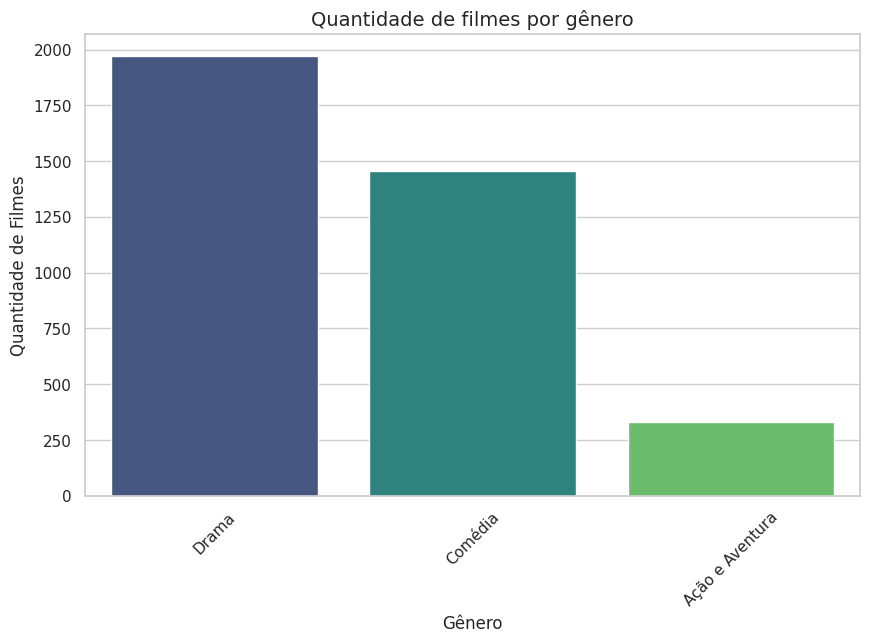

In [197]:
df_generos = contagem_generos.reset_index()
df_generos.columns = ['Gênero', 'Quantidade']

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Gênero', y='Quantidade', data=df_generos, palette='viridis')

plt.title('Quantidade de filmes por gênero', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Quantidade de Filmes', fontsize=12)

plt.show()

Nesta primeira questão, resolvemos saber qual é o gênero que representa maior quantidade de filmes avaliados e na plataforma.

Vemos que há uma preferência na produção de filmes do gênero "Drama" em comparação com os outros dois gêneros.

**EXPLICAÇÃO**

Para este código, tivemos que **normalizar** os nomes dos gêneros, já que eles apareciam diferentes nos Dataframes.

Depois disso nós **filtramos** os gêneros, e por fim, contamos a quantidade de filmes para cada um dos 3 gêneros.

### **Qual a classificação com maior incidência dentre os gêneros Drama, Comédia e Ação e Aventura?**

In [198]:
# Filtra os filmes por gênero
generos_desejados = ['Drama', 'Ação e Aventura', 'Comédia']
filmes_filtrados = combinado[combinado['genero_total'].isin(generos_desejados)]

nome_coluna_classificacao = 'classifica'

# Encontra a classificação mais comum para cada gênero
incidencia_classificacao = filmes_filtrados.groupby(['genero_total', nome_coluna_classificacao]).size().reset_index(name='contagem')
classificacao_max = incidencia_classificacao.loc[incidencia_classificacao.groupby('genero_total')['contagem'].idxmax()]

tabela_classificacao_max = pd.DataFrame(classificacao_max)

# Exibi a tabela formatada
print(tabulate(tabela_classificacao_max, headers='keys', tablefmt='pretty'))

+----+-----------------+------------+----------+
|    |  genero_total   | classifica | contagem |
+----+-----------------+------------+----------+
| 3  | Ação e Aventura |     R      |   110    |
| 9  |     Comédia     |     R      |   500    |
| 15 |      Drama      |     R      |   819    |
+----+-----------------+------------+----------+


Através desta análise, conseguimos saber qual é a classificação com maior incidencia entre os gêneros.

Em todos os gêneros, tivemos que é a Restrict - R.

Isso significa que menores de 17 anos não devem assistir a esteS filmes.


**EXPLICAÇÃO**

Nós primeiramente **filtramos** os gêneros para apenas aparecerem os desejados.

Fizemos então a **contagem da classificação** e selecionamos a com valores maiores, que iriam ser a nossa incidencia.

Após isso, nós **exibimos** a tabela.

### **Há uma relação entre a duração do filme e a avaliação do público em cada gênero? (Regressão Linear)**


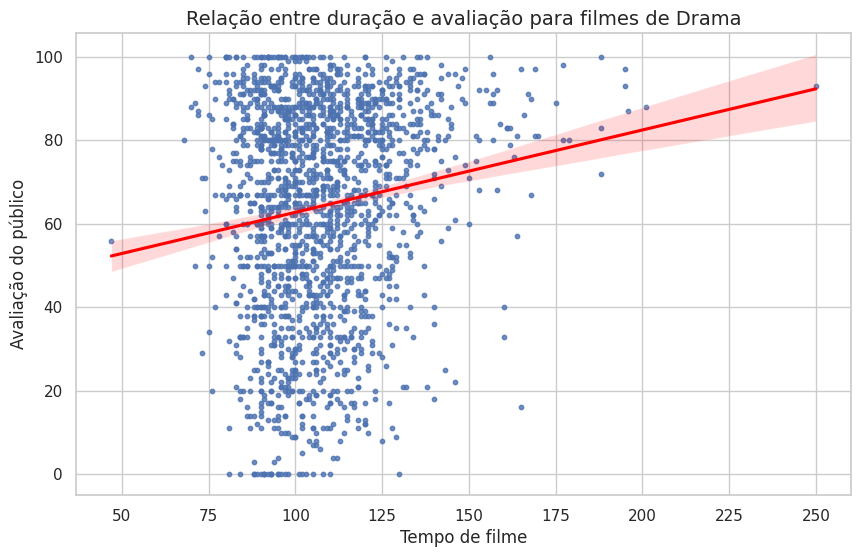

In [199]:
# Gênero Drama

plt.figure(figsize=(10, 6))
sns.regplot(x='tempo_filme', y='tomato_avalia', data=combinado[combinado['genero_total'] == 'Drama'], scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Relação entre duração e avaliação para filmes de Drama', fontsize=14)
plt.xlabel('Tempo de filme', fontsize=12)
plt.ylabel('Avaliação do público', fontsize=12)
plt.show()


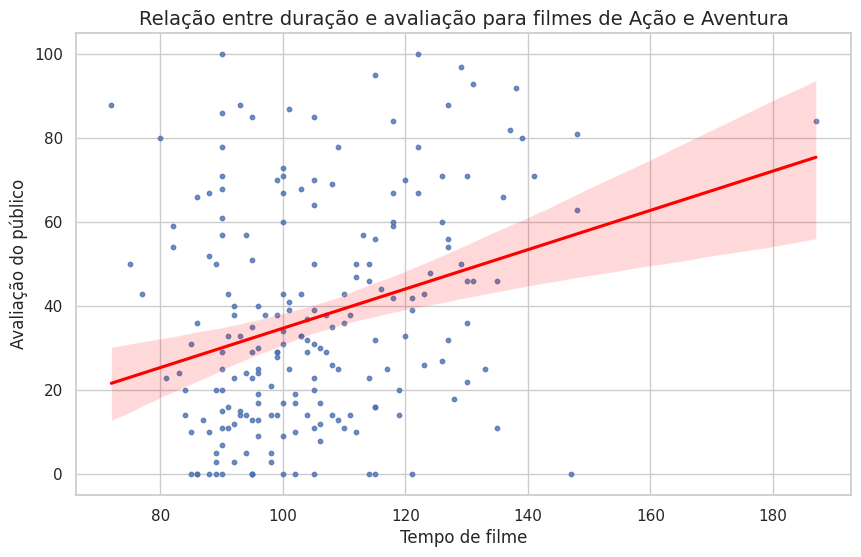

In [200]:
# Gênero Ação e Aventura

plt.figure(figsize=(10, 6))
sns.regplot(x='tempo_filme', y='tomato_avalia', data=combinado[combinado['genero_total'] == 'Ação e Aventura'], scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Relação entre duração e avaliação para filmes de Ação e Aventura', fontsize=14)
plt.xlabel('Tempo de filme', fontsize=12)
plt.ylabel('Avaliação do público', fontsize=12)
plt.show()


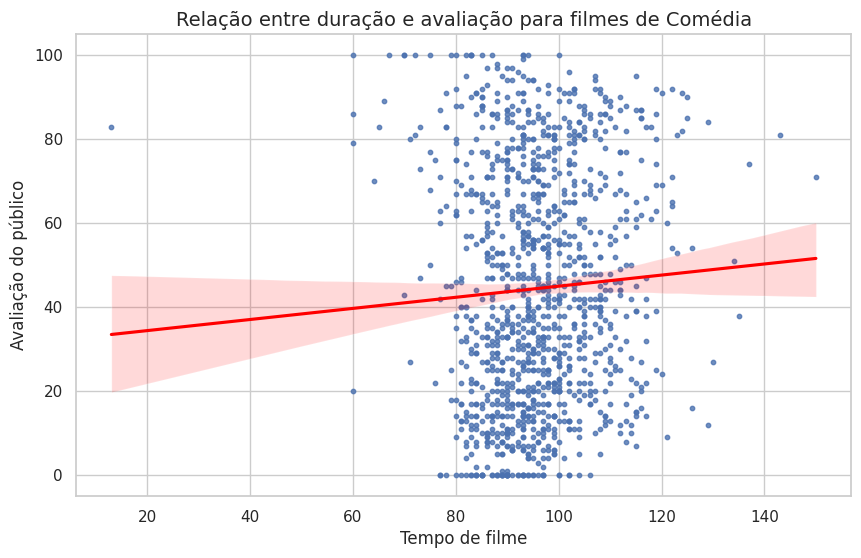

In [201]:
# Gênero Comédia

plt.figure(figsize=(10, 6))
sns.regplot(x='tempo_filme', y='tomato_avalia', data=combinado[combinado['genero_total'] == 'Comédia'], scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Relação entre duração e avaliação para filmes de Comédia', fontsize=14)
plt.xlabel('Tempo de filme', fontsize=12)
plt.ylabel('Avaliação do público', fontsize=12)
plt.show()


No caso dos 3 gráficos, cada qual representando seu gênero, podemos notar que, por mais que haja dispersão maior em relação a duração dos filmes, a relação apresentada nos gráficos é fraca.

Podemos entender então que há fatores que podem estar afetando mais as avaliações do público do que a duração dos filmes.

**EXPLICAÇÃO**

Nós primeiramente **filtramos** as avaliações do Rotten Tomatoes e o tempo de filme de cada um dos gêneros de forma separada, e **plotamos** os gráficos.

### **Qual gênero tem a maior variação na duração dos filmes?**


<ipython-input-202-b67206c09f89>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=desvio_padrao_duracao.values, y=desvio_padrao_duracao.index, palette='coolwarm')


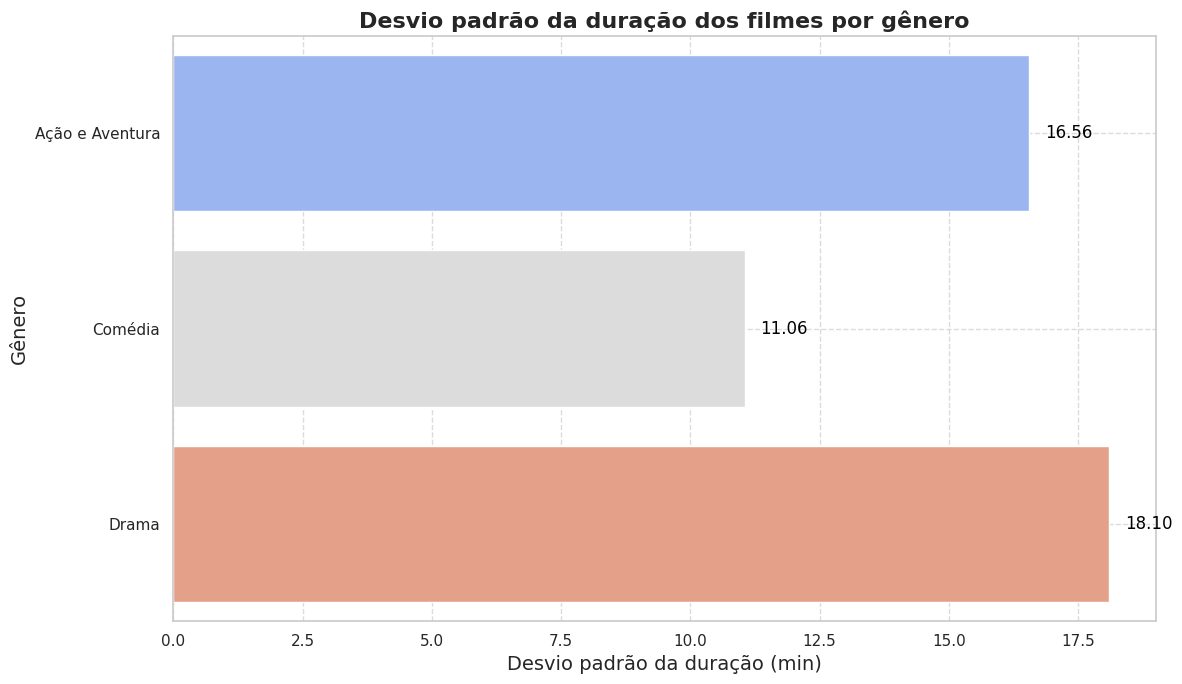

In [202]:
# Gráfico
sns.set(style='whitegrid')

# Calcula o desvio padrão
desvio_padrao_duracao = filmes_generos.groupby('genero_total')['tempo_filme'].std()

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=desvio_padrao_duracao.values, y=desvio_padrao_duracao.index, palette='coolwarm')
plt.title('Desvio padrão da duração dos filmes por gênero', fontsize=16, fontweight='bold')
plt.xlabel('Desvio padrão da duração (min)', fontsize=14)
plt.ylabel('Gênero', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_width() + 0.3, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=12, color='black')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Através desta observação, temos que o desvio padrão maior acontece nos filmes de "drama". Isso significa que ele possui um maior número de filmes com durações diferentes, assim como os de "ação e aventura".

Já os filmes de "comédia" possuem um desvio padrão menor. Podemos pensar que talvés seja por conta do formato em que os filmes deste gênero segue, possuindo ritmos mais semelhantes.

**EXPLICAÇÃO**

**Criamos** um gráfico de barras que mostra a variação na duração dos filmes para diferentes gêneros (**desvio padrão**), ajudando a visualizar qual gênero tem mais variação na duração dos filmes.

### **Qual a quantidade de filmes lançados nos últimos 3 anos pela Netflix (drama, ação e aventura e comédia)?**

<ipython-input-203-a245955b5440>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=contagem_total_lancamentos.index, y=contagem_total_lancamentos.values, palette='Set2')


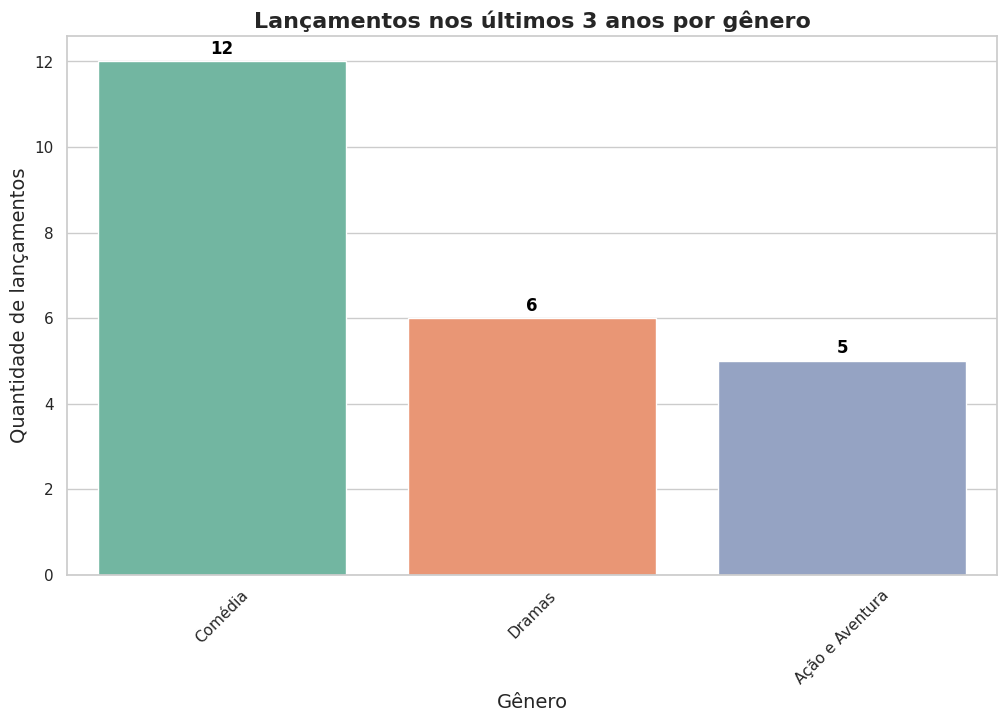

,count
genero_total,
Comédia,12
Dramas,6
Ação e Aventura,5


In [203]:
# Calcula intervalo nos últimos 3 anos
ano_atual = pd.Timestamp.now().year
ano_inicio = ano_atual - 3

# Definir e filtra os gêneros de interesse
generos_interesse = ['Dramas', 'Comédia', 'Ação e Aventura']

filmes_recentes = combinado[
    (combinado['ano_lanca_net'] >= ano_inicio) &
    (combinado['ano_lanca_net'] <= ano_atual) &
    (combinado['genero_total'].isin(generos_interesse))
]

contagem_total_lancamentos = filmes_recentes['genero_total'].value_counts()

# Gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=contagem_total_lancamentos.index, y=contagem_total_lancamentos.values, palette='Set2')

plt.title('Lançamentos nos últimos 3 anos por gênero', fontsize=16, fontweight='bold')
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Quantidade de lançamentos', fontsize=14)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=12, color='black', fontweight='bold')

plt.xticks(rotation=45)
plt.show()

# Mostrar a contagem total de lançamentos
contagem_total_lancamentos

Podemos ver que, mesmo o "drama" sendo um gênero com maior número de filmes na plataforma e avaliados, nos últimos 3 anos, a Netflix teve muito mais lançamentos de filmes de "comédia".


**EXPLICAÇÃO**

Nós primeiramente **definimos o intervalo** de tempo de 3 anos.

Depois **filtramos** os filmes e contamos o número de lançamentos por gênero.

Então **plotamos** o gráfico.

### **Qual foi o gênero com mais notas altas no Rotten Tomatoes?**

<ipython-input-206-3ebbda7ecef0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filmes_rotten['publi_'] = pd.to_numeric(filmes_rotten['publi_avalia'], errors='coerce')
<ipython-input-206-3ebbda7ecef0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=media_notas_por_genero.index, y=media_notas_por_genero.values, palette='Set2')


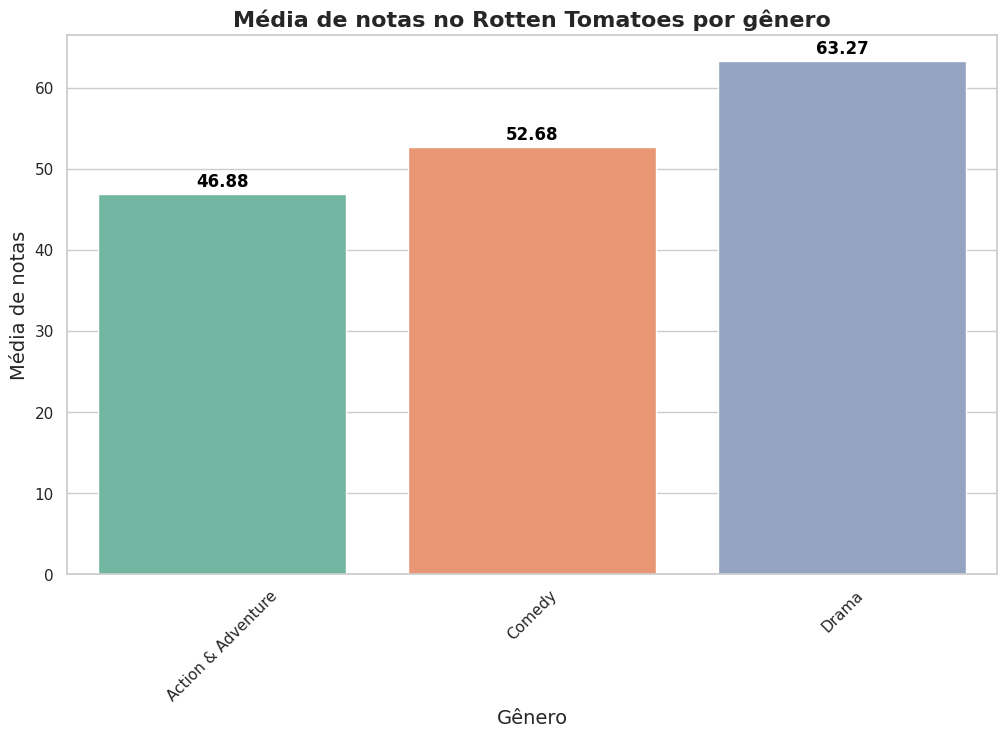

In [206]:
# Filtrar os gêneros
generos_interesse = ['Drama', 'Comedy', 'Action & Adventure']
filmes_rotten = filmes[filmes['genero'].isin(generos_interesse)]

filmes_rotten['publi_'] = pd.to_numeric(filmes_rotten['publi_avalia'], errors='coerce')
filmes_rotten = filmes_rotten.dropna(subset=['publi_avalia']) # valores não nulos

# Calculo da
media_notas_por_genero = filmes_rotten.groupby('genero')['publi_avalia'].mean()
genero_mais_notas_altas = media_notas_por_genero.idxmax()

sns.set(style="whitegrid")

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=media_notas_por_genero.index, y=media_notas_por_genero.values, palette='Set2')

plt.title('Média de notas no Rotten Tomatoes por gênero', fontsize=16, fontweight='bold')
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Média de notas', fontsize=14)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=12, color='black', fontweight='bold')

plt.xticks(rotation=45)
plt.show()

A análise mostrou que o gênero "drama" teve as notas mais altas no Rotten Tomatoes, seguido por "comédia" e "ação e aventura". Isso sugere que os críticos tendem a valorizar mais filmes de "drama", enquanto "comédias" e filmes de ação podem enfrentar avaliações mais rigorosas, apesar de sua popularidade com o público.


**EXPLICAÇÃO**

Depois **filtramos** os gêneros e preparamos os dados convertendo as avaliações do público para numérico.

Então **calculamos** a média das notas para plotar no gráfico.

### **Qual o gênero com maior taxa de sucesso? ("Fresh vs. "Rotten")**

tomato_status       Certified-Fresh  Fresh  Rotten  Taxa de sucesso (%)
genero                                                                 
Action & Adventure               13     33     158            17.277487
Comedy                          149    291     819            26.216216
Drama                           493    693     698            49.820273


<ipython-input-139-58d166710837>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_contagem.index, y=status_contagem['Taxa de sucesso (%)'], palette='Set2')


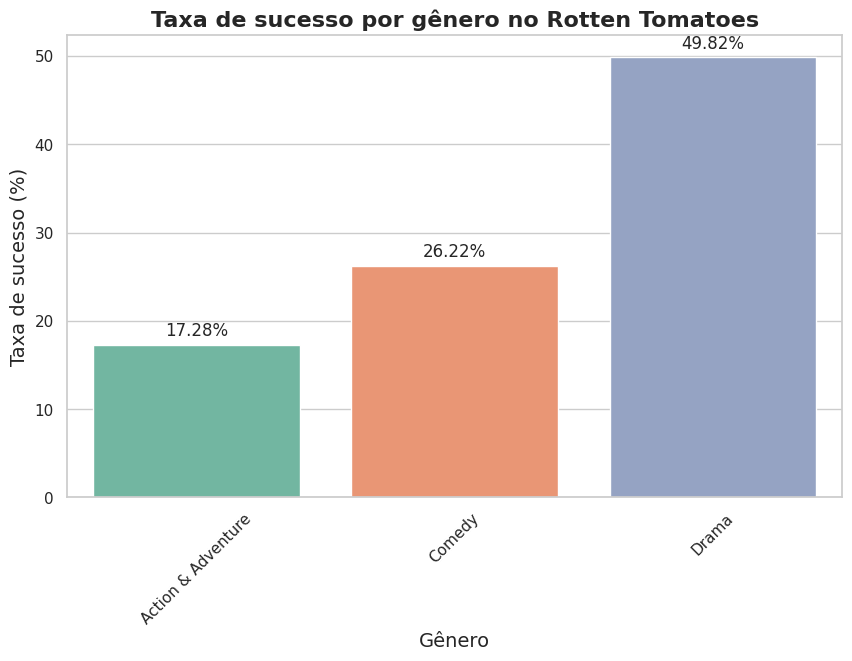

In [139]:
# Definir os gêneros de interesse
generos_interesse = ['Drama', 'Comedy', 'Action & Adventure']
filmes_generos = filmes[filmes['genero'].isin(generos_interesse)]

status_contagem = filmes_generos.groupby(['genero', 'tomato_status']).size().unstack(fill_value=0)

# Calculo - taxa de sucesso
status_contagem['Taxa de sucesso (%)'] = (status_contagem['Fresh'] /
                                          (status_contagem['Fresh'] + status_contagem['Rotten'])) * 100

# Tabela de taxa de sucesso
print(status_contagem)

plt.figure(figsize=(10, 6))
sns.barplot(x=status_contagem.index, y=status_contagem['Taxa de sucesso (%)'], palette='Set2')

plt.title('Taxa de sucesso por gênero no Rotten Tomatoes', fontsize=16, fontweight='bold')
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Taxa de sucesso (%)', fontsize=14)

for i, v in enumerate(status_contagem['Taxa de sucesso (%)']):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontsize=12)

plt.xticks(rotation=45)
plt.show()

Podemos notar que os filmes de "drama" são muito mais bem avaliados que os outros gêneros. Isso pode ter várias razões, entre elas a profundidade narrativa e a qualidade artística que pode chamar mais a atenção dos críticos.

Tanto que, se olharmos na tabela, podemos ver uma quantidade grande de filmes de "comédia" no Rotten.

### **Qual a comparação que podemos fazer entre a avaliação do público e a avaliação dos críticos?**

                    Média - Avaliação do público  \
genero                                             
Action & Adventure                     46.882353   
Comedy                                 52.680033   
Drama                                  63.270270   

                    Média - Avaliação dos críticos  
genero                                              
Action & Adventure                       36.965686  
Comedy                                   46.155679  
Drama                                    64.366242  


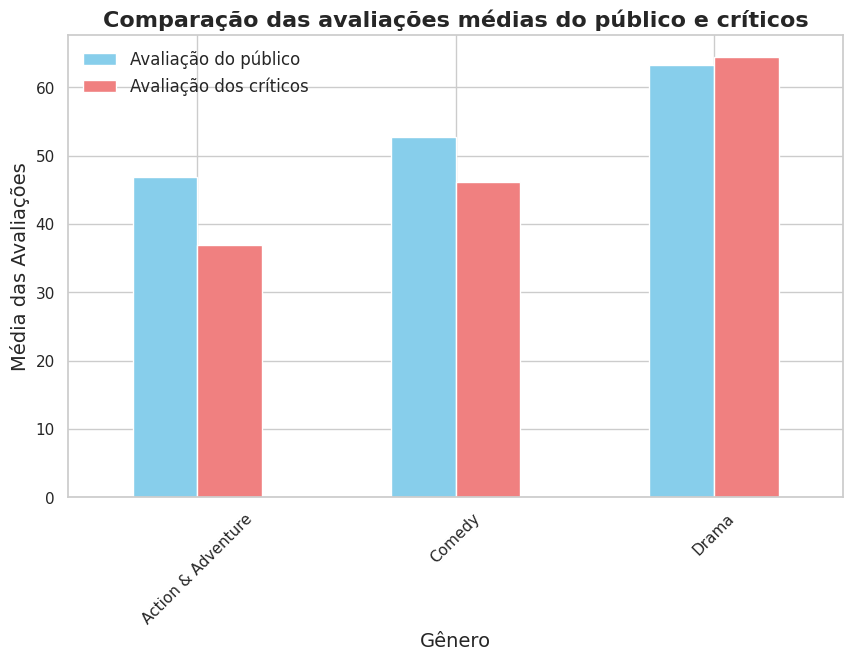

In [140]:
generos_interesse = ['Drama', 'Comedy', 'Action & Adventure']

# Filtra os filmes
filmes_generos = filmes[filmes['genero'].isin(generos_interesse)]

# Calcula a média
avaliacoes_medias = filmes_generos.groupby('genero')[['publi_avalia', 'tomato_avalia']].mean()

avaliacoes_medias.columns = ['Média - Avaliação do público', 'Média - Avaliação dos críticos']
print(avaliacoes_medias)

# Gráfico
avaliacoes_medias.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.title('Comparação das avaliações médias do público e críticos', fontsize=16, fontweight='bold')
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Média das Avaliações', fontsize=14)
plt.xticks(rotation=45)

plt.legend(['Avaliação do público', 'Avaliação dos críticos'], fontsize=12)

plt.show()

Os filmes de "drama" recebem notas mais altas dos críticos, o que mostra que eles apreciam mais esse gênero, provavelmente pela profundidade das histórias. Já os filmes de "comédia" e "ação e aventura" tem notas menores dos críticos, sugerindo que eles valorizam menos esses gêneros, apesar de serem populares entre o público.

**EXPLICAÇÃO**

Primeiro** definimos** os nossos gêneros de interesse e **separamos** os seus filmes.

Depois **calculamos a média** por gênero e podemos fazer a comparação.

### **Há uma diferença significativa nas avaliações médias do público entre filmes de "Drama" e "Comédia"? (Teste de Hipótese)**

In [207]:
# Filtrar os filmes pelo gênero
filmes_drama = combinado[combinado['genero_total'] == 'Drama']
filmes_comedia = combinado[combinado['genero_total'] == 'Comédia']

avaliacoes_drama = filmes_drama['avalia_publico'].dropna()  # Remover valores NaN
avaliacoes_comedia = filmes_comedia['avalia_publico'].dropna()  # Remover valores NaN

# Realizar o teste t
t_stat, p_value = stats.ttest_ind(avaliacoes_drama, avaliacoes_comedia)

print(f'Estatística t: {t_stat:.2f}')
print(f'Valor p: {p_value:.4f}')

# Resultados
alpha = 0.10  # Nível de significância
if p_value < alpha:
    print('Rejeitamos a hipótese nula. Há uma diferença significativa nas avaliações médias do público entre Drama e Comédia.')
else:
    print('Não rejeitamos a hipótese nula. Não há uma diferença significativa nas avaliações médias do público entre Drama e Comédia.')

Estatística t: 1.72
Valor p: 0.0880
Rejeitamos a hipótese nula. Há uma diferença significativa nas avaliações médias do público entre Drama e Comédia.


Por mais que tenha mais riscos, optei por mudar o nível de significancia para 0.10.
Por conta disso, consegui ver que há sim mudanças significativas nas avaliações médias do público entre "drama" e de "comédia".

**EXPLICAÇÃO**

Fizemos a **filtragem** separando os filmes de drama e comédia e removemos avaliações nulas.

Através do Teste t nós **comparamos as médias** das avaliações de público entre drama e comédia.

**Exibimos o resultado.** Lembrando que nós aumentamos o nível de significancia para 0.10.

### **Qual o número de lançamentos por ano e gênero?**

<ipython-input-208-4e8f2345e58e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filmes_filtrados['ano_lanca'] = pd.to_datetime(filmes_filtrados['ano_lanca'], errors='coerce').dt.year


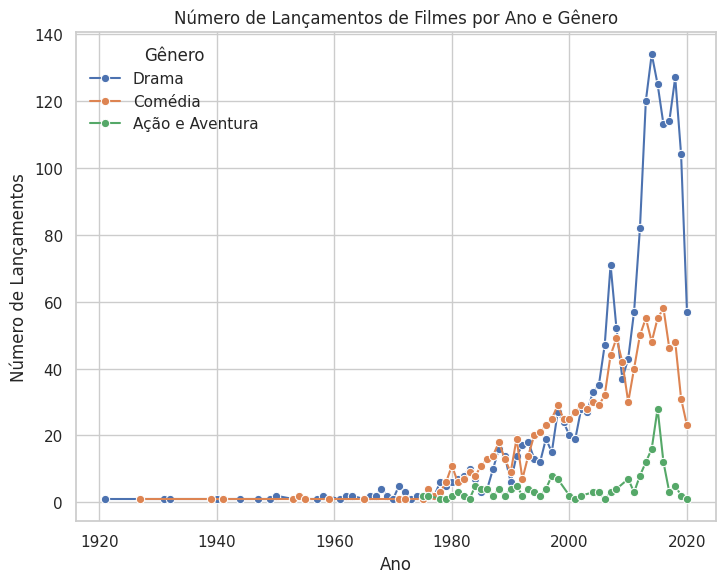

In [208]:
# Filtrar os filmes
generos_desejados = ['Drama', 'Ação e Aventura', 'Comédia']
filmes_filtrados = combinado[combinado['genero_total'].isin(generos_desejados)]


filmes_filtrados['ano_lanca'] = pd.to_datetime(filmes_filtrados['ano_lanca'], errors='coerce').dt.year
lancamentos_por_ano = filmes_filtrados.groupby(['ano_lanca', 'genero_total']).size().reset_index(name='contagem')

# Gráfico
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=lancamentos_por_ano, x='ano_lanca', y='contagem', hue='genero_total', marker='o')
plt.title('Número de Lançamentos de Filmes por Ano e Gênero')
plt.xlabel('Ano')
plt.ylabel('Número de Lançamentos')
plt.legend(title='Gênero')

plt.tight_layout()
plt.show()

Atraves deste gráfico, conseguimos perceber que a produção e lançamento de filmes de "drama", sempre foi muito grande comparado com os dois outros temas.

Ele se destaca principalmente nos anos 2000.

Já os filmes de Ação e Aventura, acabam ficando com um número de lançamentos bem menor.

**EXPLICAÇÃO**

**Filtramos** os filmes dos gêneros escolhidos.

**Convertemos** o ano de lançamento para o formato de ano e **contamos** os números de lançamentos por ano e gênero.

**Plotamos** o gráfico.

## **CONCLUSÃO**



**Qualidade Crítica**


* **Drama**: filmes de drama geralmente recebem notas mais altas dos críticos, possivelmente por suas histórias mais profundas e bem feitas.
* **Comédia e Ação e Aventura:** esses gêneros recebem notas mais baixas dos críticos, que podem achar essas produções menos sofisticadas, embora sejam populares entre o público.


**Popularidade e Produção**

* **Drama:** há muitos filmes de drama, especialmente notáveis nos anos 2000, sugerindo que é um gênero muito valorizado e amplamente produzido.
* **Comédia:** embora haja muitos filmes de comédia, eles não são tão bem avaliados pela crítica.
* **Ação e Aventura:** menos filmes desse gênero são produzidos em comparação com drama e comédia, indicando uma menor ênfase na produção desses filmes.

**Diferença nas Avaliações**

A análise com um nível de significância de 0.10 mostrou que há uma diferença significativa nas notas médias entre filmes de drama e comédia. Isso confirma que os dramas são mais bem avaliados pela crítica.

**Tendências de Lançamento**

O gráfico mostra que filmes de drama foram lançados em maior quantidade ao longo dos anos, enquanto filmes de ação e aventura têm um número menor de lançamentos.

**Conclusão**

Filmes de drama são mais bem avaliados pelos críticos e têm uma produção consistente ao longo dos anos. Comédia e ação e aventura são populares, mas menos valorizados pelos críticos e têm uma produção menos constante.